In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Help from learn platform and stack overflow

In [3]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
df = pd.read_csv("https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv")
#print(df.head())
#print(df.isna().sum())
df['Defaulted'].value_counts()
df['Defaulted'].fillna(1, inplace = True)
print(df.isna().sum())

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


In [21]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


Text(0, 0.5, 'inertia')

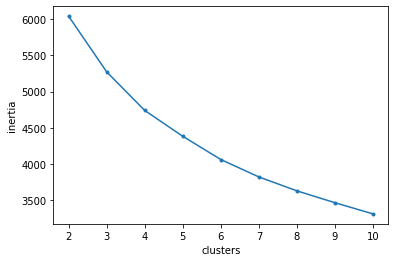

In [23]:
inertias = []
for k in range (2, 11):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Text(0, 0.5, 'Silhouette Score')

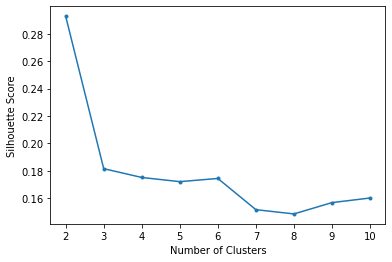

In [24]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

Based on the above graphs, it appears k = 2 is our best bet, mainly because the silhouette score dramatically decreases from 2 to 3.  

In [25]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


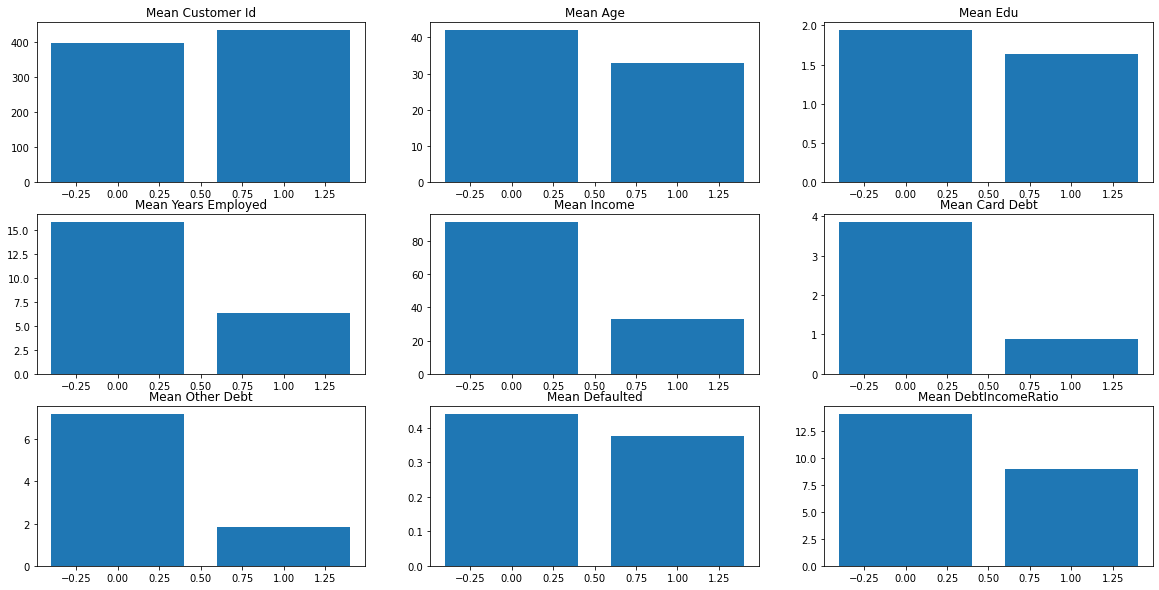

In [27]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
fig, axes = plt.subplots(3,3, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

The mean customer ID's are about the same, which makes sense since ID is not a descriptive value.  The mean age is about 7 years greater for cluster 0 than cluster 1.  For mean education, the value is about 0.3 points higher in cluster 0, which makes sense since the mean age for this cluster is higher.  For mean years employed, cluster 0 has a value of about double that of cluster 1, which also makes sense given the age difference described above.  Additionally, the mean income for cluster 0 is more than double that of cluster 1, which aligns with the fact that cluster 0 is more educated, older, and has more years of employment. Cluster 0 also has greater mean card debt due to handling expenses for longer.  Furthermore, mean other debt is also higher for cluster 0 for the same reason.  Mean defaulted is about the same, which is interesting becasue one would expected this to occur more times for an older population, but given that young people are becoming more irresponsible this would make sense that cluster 1's value is around the same as that of cluster 0.  Finally, Mean Debt Income Ratio is higher for cluster 0 than cluster 1 by a noticeable amount, probably because there is more debt accumulated due to larger purchases for an older and more experienced group of people found in cluster 0.